In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='gpt2'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-5, 5.0e-5 ,1.0e-4]

for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.device = model.device
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       accumulation_steps=2,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search gpt2, learning rate 1e-05


Map:   0%|          | 0/1796 [00:00<?, ? examples/s]

Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.5212	Val Loss:	0.7320	Accuracy:	0.6455	F1:	0.4992
2 / 30: Train Loss:	0.3363	Val Loss:	0.6548	Accuracy:	0.6521	F1:	0.5165
3 / 30: Train Loss:	0.3078	Val Loss:	0.5999	Accuracy:	0.6937	F1:	0.5031
4 / 30: Train Loss:	0.2928	Val Loss:	0.5853	Accuracy:	0.7068	F1:	0.5441
5 / 30: Train Loss:	0.2833	Val Loss:	0.5676	Accuracy:	0.7243	F1:	0.5678
6 / 30: Train Loss:	0.2737	Val Loss:	0.5477	Accuracy:	0.7418	F1:	0.5884
7 / 30: Train Loss:	0.2649	Val Loss:	0.5249	Accuracy:	0.7790	F1:	0.6521
8 / 30: Train Loss:	0.2550	Val Loss:	0.5045	Accuracy:	0.7921	F1:	0.6755
9 / 30: Train Loss:	0.2487	Val Loss:	0.4910	Accuracy:	0.7965	F1:	0.6685
10 / 30: Train Loss:	0.2504	Val Loss:	0.4800	Accuracy:	0.7987	F1:	0.6706
11 / 30: Train Loss:	0.2426	Val Loss:	0.4720	Accuracy:	0.8096	F1:	0.6952
12 / 30: Train Loss:	0.2370	Val Loss:	0.4703	Accuracy:	0.8074	F1:	0.6877
13 / 30: Train Loss:	0.2283	Val Loss:	0.4571	Accuracy:	0.8053	F1:	0.6984
14 / 30: Train Loss:	0.2283	Val Loss:	0.4482	Accuracy:	0.811

Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.3727	Val Loss:	0.6011	Accuracy:	0.7068	F1:	0.5202
2 / 30: Train Loss:	0.2833	Val Loss:	0.5482	Accuracy:	0.7615	F1:	0.6148
3 / 30: Train Loss:	0.2640	Val Loss:	0.5004	Accuracy:	0.7987	F1:	0.6515
4 / 30: Train Loss:	0.2407	Val Loss:	0.4704	Accuracy:	0.8053	F1:	0.7032
5 / 30: Train Loss:	0.2196	Val Loss:	0.4988	Accuracy:	0.7593	F1:	0.7001
6 / 30: Train Loss:	0.2058	Val Loss:	0.4402	Accuracy:	0.8118	F1:	0.7248
7 / 30: Train Loss:	0.1864	Val Loss:	0.4293	Accuracy:	0.8184	F1:	0.7476
8 / 30: Train Loss:	0.1582	Val Loss:	0.4388	Accuracy:	0.8162	F1:	0.7587
9 / 30: Train Loss:	0.1344	Val Loss:	0.5028	Accuracy:	0.8053	F1:	0.7602
10 / 30: Train Loss:	0.1214	Val Loss:	0.4717	Accuracy:	0.8053	F1:	0.7492
11 / 30: Train Loss:	0.0950	Val Loss:	0.4931	Accuracy:	0.8381	F1:	0.7681
12 / 30: Train Loss:	0.0792	Val Loss:	0.7517	Accuracy:	0.8009	F1:	0.6666
13 / 30: Train Loss:	0.0926	Val Loss:	0.5769	Accuracy:	0.8381	F1:	0.7886
14 / 30: Train Loss:	0.0518	Val Loss:	0.7763	Accuracy:	0.733

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.3610	Val Loss:	0.5853	Accuracy:	0.7418	F1:	0.4495
2 / 30: Train Loss:	0.2831	Val Loss:	0.5234	Accuracy:	0.7593	F1:	0.5306
3 / 30: Train Loss:	0.2563	Val Loss:	0.4940	Accuracy:	0.7856	F1:	0.6666
4 / 30: Train Loss:	0.2268	Val Loss:	0.4617	Accuracy:	0.8118	F1:	0.7342
5 / 30: Train Loss:	0.1966	Val Loss:	0.4290	Accuracy:	0.8206	F1:	0.7276
6 / 30: Train Loss:	0.1627	Val Loss:	0.4329	Accuracy:	0.8271	F1:	0.7344
7 / 30: Train Loss:	0.1269	Val Loss:	0.5092	Accuracy:	0.7724	F1:	0.7333
8 / 30: Train Loss:	0.1022	Val Loss:	0.5202	Accuracy:	0.8293	F1:	0.7522
9 / 30: Train Loss:	0.0643	Val Loss:	1.0455	Accuracy:	0.8031	F1:	0.6522
10 / 30: Train Loss:	0.0575	Val Loss:	1.1503	Accuracy:	0.8118	F1:	0.6835
11 / 30: Train Loss:	0.0736	Val Loss:	0.5549	Accuracy:	0.8359	F1:	0.7689
12 / 30: Train Loss:	0.0339	Val Loss:	0.8036	Accuracy:	0.7812	F1:	0.7436
13 / 30: Train Loss:	0.0375	Val Loss:	0.7588	Accuracy:	0.8140	F1:	0.7630
14 / 30: Train Loss:	0.0224	Val Loss:	1.1139	Accuracy:	0.814

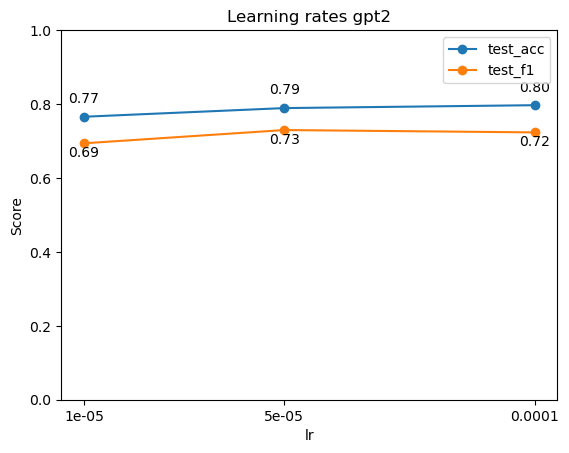

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Learning rates {model_checkpoint}',
                        column='lr',
                        sci_format=False)

In [6]:
%reset -f